In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


titanic_df = pd.read_csv('./data/titanic/train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId : 탑승자 데이터 일련번호  
Survived : 생존여부, 0=사망, 1=생존  
Pclass : 티켓의 선실 등급, 1=일등석, 2=이등석, 3=삼등석  
Name : 탑승자 이름  
Sex	: 탑승자 성별  
Age :  탑승자 나이  
SibSp : 같이 탑승한 형제자매 또는 배우자 인원수  
Parch : 같이 탑승한 부모님 또는 어린이 인원수   
Ticket : 티켓번호  
Fare : 요금  
Cabin :선실번호  
Embarked : 중간 정착 항구 C=Cherbourg, Q=Queenstown, S=Southampton  

### drop하기 전에는 유용한 feature를 뽑아낼수있는지 확인

In [12]:
# Name은 종류가 너무 많아서 feature로서 유의미하지 않아 보인다.
# 그러나 데이터를 필요없다고 막 지울 수 없다. (어떤 잠재의미가 있을 수도 있다.) 
titanic_df['Name'].value_counts()  

Harper, Mrs. Henry Sleeper (Myna Haxtun)      1
Kelly, Mr. James                              1
Flynn, Mr. John Irwin ("Irving")              1
Carter, Miss. Lucile Polk                     1
Rogers, Mr. William John                      1
                                             ..
Petroff, Mr. Nedelio                          1
Carlsson, Mr. August Sigfrid                  1
Hegarty, Miss. Hanora "Nora"                  1
Mellinger, Mrs. (Elizabeth Anne Maidment)     1
Strom, Mrs. Wilhelm (Elna Matilda Persson)    1
Name: Name, Length: 891, dtype: int64

In [ ]:
# Data Mining : 데이터에서 어떤 의미를 찾는 것.
# 외국의 경우, 이름에 가문이 표시되는 경우가 많다.
# 이름에서 성별도 알 수 있다.
titanic_df['Name']

타이타닉 데이터셋의 name에서 의미를 뽑아내는 예시는 다음 노트북을 참조:
https://www.kaggle.com/startupsci/titanic-data-science-solutions

### Null 값 처리

In [6]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)


In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
### 분포

In [11]:
print('Sex 값 분포:', titanic_df['Sex'].value_counts())
print('Cabin 값 분포 :', titanic_df['Cabin'].value_counts())
print('Embarked 값 분포', titanic_df['Embarked'].value_counts())

Sex 값 분포: male      577
female    314
Name: Sex, dtype: int64
Cabin 값 분포 : N              687
C23 C25 C27      4
B96 B98          4
G6               4
F33              3
              ... 
C95              1
F38              1
C86              1
F E69            1
B39              1
Name: Cabin, Length: 148, dtype: int64
Embarked 값 분포 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [21]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1] 
titanic_df['Cabin'].head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

In [23]:
titanic_df['Survived'].value_counts() # 0:사망, 1:생존

0    549
1    342
Name: Survived, dtype: int64

In [29]:
#  성별이 생존여부에 어떤 영향을 미쳤는지, 성별로 생존여부 인원수를 가져오기
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

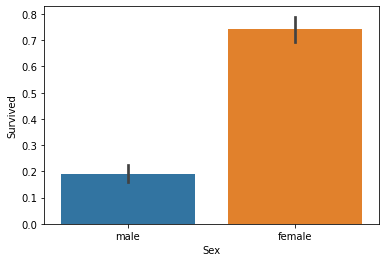

In [30]:
sns.barplot(x='Sex',y='Survived', data=titanic_df)

In [32]:
titanic_df.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

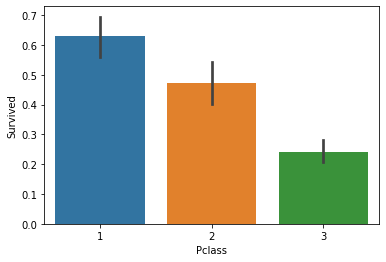

In [31]:
# 부자와  가난한 사람간의 생존여부는?
sns.barplot(x='Pclass', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

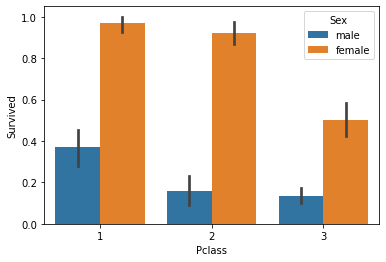

In [34]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df, hue='Sex')

연령별 생존여부

In [36]:
titanic_df['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

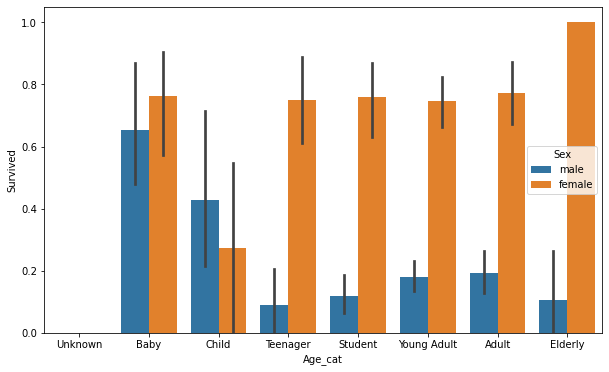

In [43]:
# 연령은 범위가 넓어서 카테고리 값을 할당해서 처리
# 0~5: Baby, 6~12:Child, 13~18:Teenager, 19~25: Student, 26~35: Young Adult, 36~60:Adult, 61이상 : Elderly

def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat


plt.figure(figsize=(10, 6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
titanic_df['Age_cat']
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)

지금까지 분석한 결과 Sex, Age, PClass등이 중요하게 생존을 좌우하는 피처임을 확인할 수 있다.  
나이가 많고, 여자이고, 1등석의 승객이 생존이 높았다.

In [44]:
from sklearn.preprocessing import LabelEncoder

In [49]:
# 'Cabin', 'Sex', 'Embarked' 속성을 숫자형으로 변경
def encode_feature(dataDF):
    features=['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le=le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

titanic_df = encode_feature(titanic_df)


In [50]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


In [51]:
# 'Cabin', 'Sex', 'Embarked' 숫자형으로 변경된 것을 확인할 수 있다.
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int32  
 12  Age_cat      891 non-null    object 
dtypes: float64(2), int32(1), int64(7), object(3)
memory usage: 87.1+ KB


앞에서 피처를 가공한 내역을 함수로 정리

In [52]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [54]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('./data/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)
X_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [87]:
from sklearn.model_selection import train_test_split
# train과 test : 80 대 20
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)


In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(max_iter=4000)

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8492


In [97]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
    
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy)) 
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 

# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 
#exec_kfold(rf_clf, folds=5)   

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [95]:
from sklearn.model_selection import StratifiedKFold
def exec_skfold(clf, folds=5):
    # 폴드 세트를 5개인 StratifiedKFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    skfold = StratifiedKFold(n_splits=folds)
    scores = []
    
    # StratifiedKFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(skfold.split(X_titanic_df, y_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        #X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        #y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        X_train, X_test = X_titanic_df[train_index], X_titanic_df[test_index]
        y_train, y_test = y_titanic_df[train_index], y_titanic_df[test_index]
    
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy)) 
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 

# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 
#exec_kfold(rf_clf, folds=5)   

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [91]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [92]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))


GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
